# First Keras project - Logistic Regression

In [178]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os

from numpy import loadtxt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Data loading and processing

In [179]:
iris = datasets.load_iris(as_frame=True)

In [180]:
df = iris["data"]
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [181]:
df.shape

(150, 5)

According to the dataframe's shape, there is 150 samples and 4 features, which will enable the model to achieve our task. However, this data frame contain 3 classes: 0, 1 and 2. In order to solve a binary classification problem class 0 and 1 will be join together.

In [182]:
data = df.to_numpy()

X = data[:, 0:4]
print(X)

y = data[:, -1]
print(y)

y = (y == 2)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Model

### Definition

In [183]:
model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_157"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_417 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [184]:
def create_model():
  model = Sequential()
  model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

### Training and Evaluation

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8414 - loss: 0.3276  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9424 - loss: 0.3033  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9635 - loss: 0.3594  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9767 - loss: 0.2134  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9790 - loss: 0.1858  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8898 - loss: 0.2732  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9513 - loss: 0.2476  


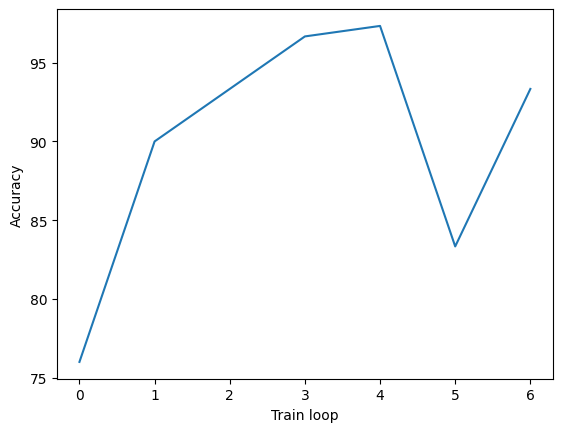

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1.0


In [185]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
actual_acc = 0
accuracies = []

# 10 train loop
for _ in range(7):
  model = create_model()
  model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)

  _, accuracy = model.evaluate(X, y)
  accuracies.append(accuracy * 100)

  if accuracy > actual_acc:
    actual_acc = accuracy
    # Save the weights
    model.save_weights('./model.weights.h5')
  else:
    continue

plt.plot(range(7), accuracies)
plt.xlabel('Train loop')
plt.ylabel('Accuracy')
plt.show()

# Load the best model
model.load_weights('./model.weights.h5')

prediction = (model.predict(x_test) > 0.5).astype(int)
print(accuracy_score(y_test, prediction))

### Model's modifications

In [186]:
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_165"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_425 (Dense)               │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_426 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_427 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_428 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

## Diabets data

In [187]:
dataset = loadtxt('./dataset_diabetes.csv', delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [188]:
f = open('dataset_diabets.txt', 'r')
contents = f.read()
print(contents)
f.close()

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patien

In [189]:
X = dataset[:, 0:8]
y = dataset[:, 8]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(768, 8) (768,)


In [190]:
def create_model(input_shape, num_layers: int=False, num_neuron: int=32):
  model = Sequential(
      [Dense(num_neuron, input_shape=input_shape, activation='relu')]
  )
  if num_layers:
    for i in range(1, num_layers):
      model.add(Dense(num_neuron//(2**i), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [191]:
model_0 = create_model((8,))
model_0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_0.summary()

model_1 = create_model((8,), 3, 64)
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

model_2 = create_model((8,), 4, 64)
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential_166"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_429 (Dense)               │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_430 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_167"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_431 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_432 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_433 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_434 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_168"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_435 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_436 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_437 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_438 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_439 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [192]:
model_0.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
model_1.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
model_2.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [193]:
_, accuracy = model_0.evaluate(X_test, y_test)
print('Model_0 Accuracy: %.2f' % (accuracy*100))

_, accuracy = model_1.evaluate(X_test, y_test)
print('Model_1 Accuracy: %.2f' % (accuracy*100))

_, accuracy = model_2.evaluate(X_test, y_test)
print('Model_2 Accuracy: %.2f' % (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7134 - loss: 0.5747  
Model_0 Accuracy: 72.08
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7307 - loss: 0.6125  
Model_1 Accuracy: 73.38
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7225 - loss: 0.6030  
Model_2 Accuracy: 73.38


The loss function and the accuracy respectively doesn't decrease and increase with the number of layer which the difference of accuracy emphasize between model_1 and model_2. Nevertheless, the latter does increase with the number of neuron as it can be seen from model_0 and model_1 and subsequently with model_2. To conclude the training is obviously longer for networks which have more parameters due to the backpropagation which get more expensive as it gets deeper in the network.

In [194]:
def mlp_2dense(input_shape, num_neuron: int=32):
  model = Sequential([
      Dense(num_neuron, input_shape=input_shape, activation='relu'),
      Dense(num_neuron//2, activation='relu'),
      Dense(1, activation='sigmoid')
  ])
  return model

def plot_history(history, model_name, figsize=(6, 6), evaluate=False):
  plt.figure(figsize=figsize)
  plt.plot(hst.history['accuracy'], label='accuracy')
  plt.plot(hst.history['loss'], label='loss')
  if evaluate:
    plt.plot(hst.history['val_accuracy'], label='val_accuracy')
    plt.plot(hst.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy/Loss')
  plt.ylim([0, 1])
  plt.title(f'{model_name}')
  plt.legend(loc='lower right')
  plt.show()

In [195]:
mlp64, mlp32, mlp16, mlp8 = mlp_2dense((8,), 64), mlp_2dense((8,), 32), mlp_2dense((8,), 16), mlp_2dense((8,), 8)
l_model = [mlp64, mlp32, mlp16, mlp8]
l_history = []

for model in l_model:
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.summary()
  history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0, validation_split=0.2)
  l_history.append(history)


Model: "sequential_169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_440 (Dense)               │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_441 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_442 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_170"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_443 (Dense)               │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_444 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_445 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_171"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_446 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_447 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_448 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_172"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_449 (Dense)               │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_450 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_451 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

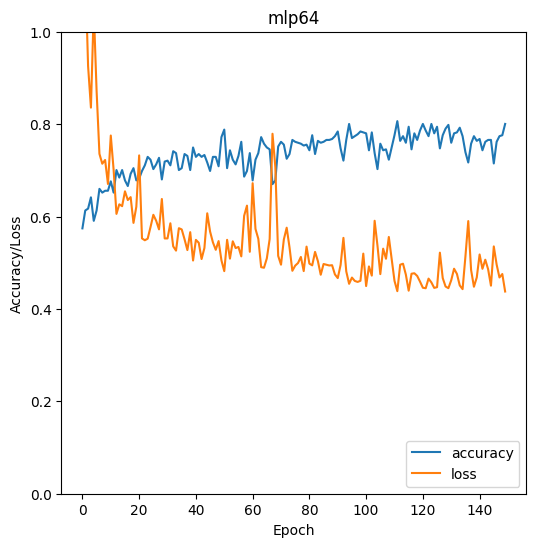

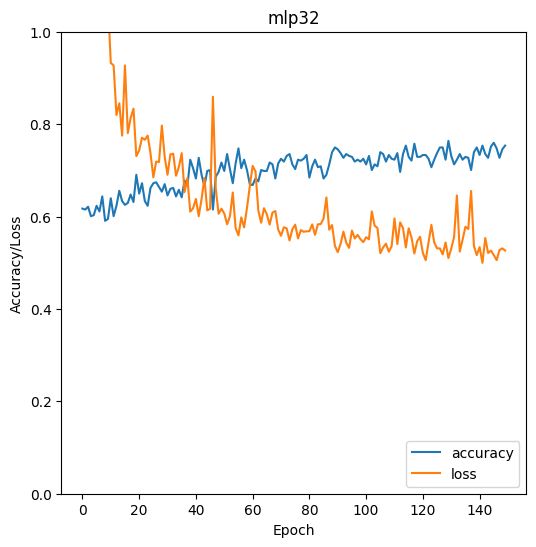

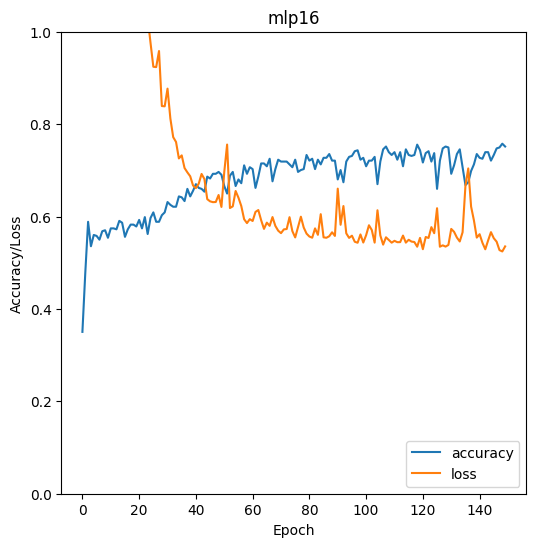

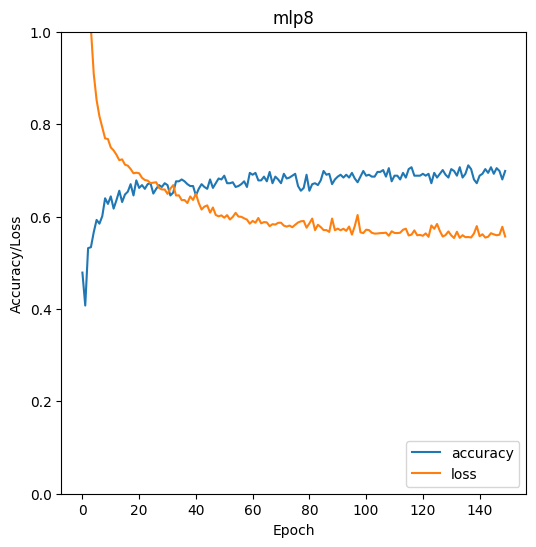

In [196]:
for hst, model_name in zip(l_history, ['mlp64', 'mlp32', 'mlp16', 'mlp8']):
  plot_history(hst, model_name)

Model: "sequential_173"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_452 (Dense)               │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_453 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_454 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

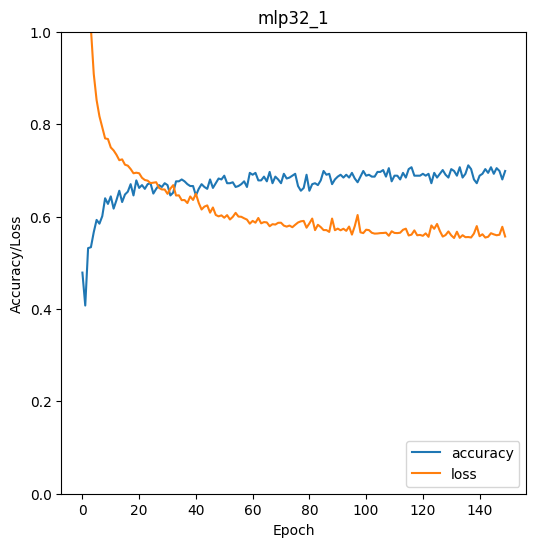

In [197]:
mlp32_1 = mlp_2dense((8,), 32)
mlp32_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp32_1.summary()
mlp32_history = mlp32_1.fit(X_train, y_train, epochs=150, batch_size=1, verbose=0)
plot_history(mlp32_history, 'mlp32_1')

In [198]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [199]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, AdamW, Adagrad

l_lr = [0.001, 0.005, 1e-2, 1e-1, 4e-1]
l_opt = [Adam, SGD, RMSprop, AdamW, Adagrad]
l_histories = {opt.__name__: {} for opt in l_opt}

for opt_class in l_opt:
    for lr in l_lr:
        optimizer = opt_class(learning_rate=lr)
        model = mlp_2dense((8,), 32)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=0)
        l_histories[opt_class.__name__][lr] = history


From now on, we will compare the performance of the model under the diffferent hyperparameters, especially accuracy and loss. To avoid, repetition, we will define herebelow some function to visualize those performance.

In [200]:
from typing import Union

def plot_hyperparameters(l_histories, lr, parameters: str):
    plt.figure(figsize=(9, 5))
    for opt_name, lr_dict in l_histories.items():
        if lr in lr_dict:
            hpm = lr_dict[lr].history[parameters]
            plt.plot(hpm, label=opt_name)
    plt.title(f"Training {parameters.capitalize()} Comparison (lr={lr})")
    plt.xlabel("Epochs")
    plt.ylabel(parameters.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_heatmap(l_histories):
    opt_names = list(l_histories.keys())
    lrs = sorted(next(iter(l_histories.values())).keys())
    acc_matrix = np.zeros((len(opt_names), len(lrs)))

    for i, opt_name in enumerate(opt_names):
        for j, lr in enumerate(lrs):
            acc_matrix[i, j] = l_histories[opt_name][lr].history['accuracy'][-1]

    plt.figure(figsize=(9, 5))
    sns.heatmap(
        acc_matrix,
        xticklabels=lrs,
        yticklabels=opt_names,
        annot=True,
        fmt=".3f",
        cmap="viridis"
    )
    plt.title("Final Training Accuracy Heatmap")
    plt.xlabel("Learning Rate")
    plt.ylabel("Optimizer")
    plt.show()

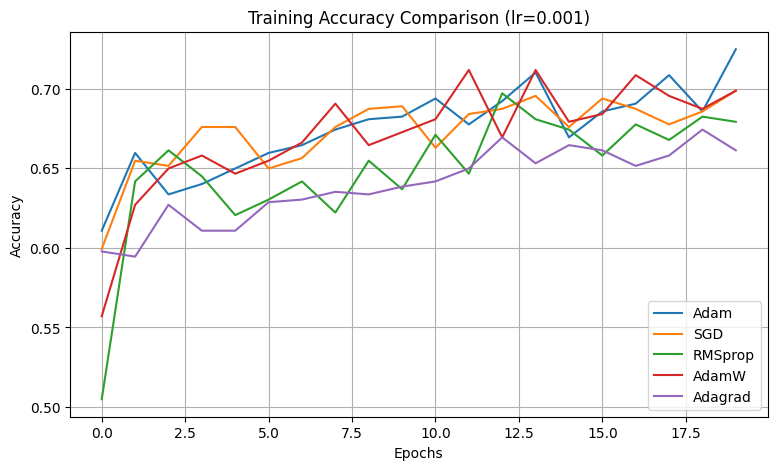

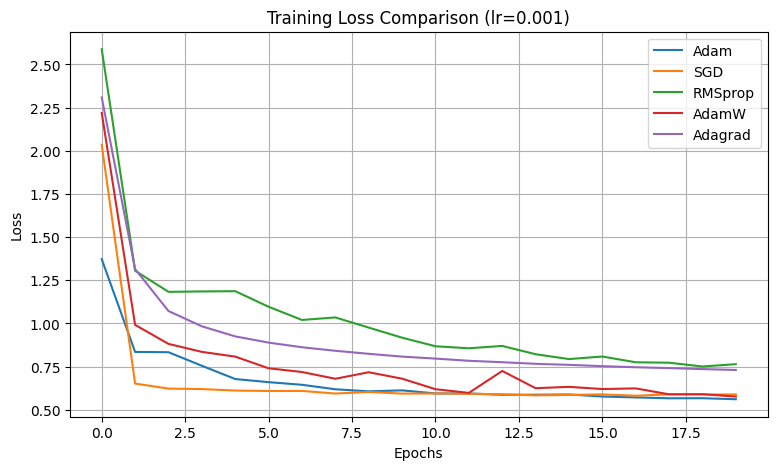

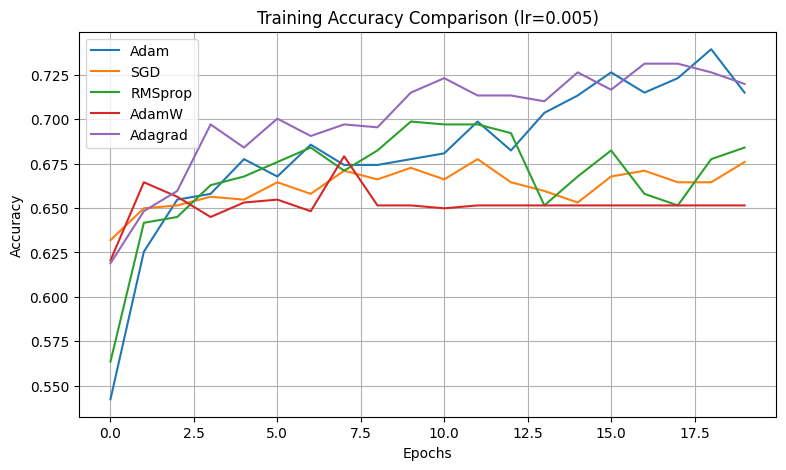

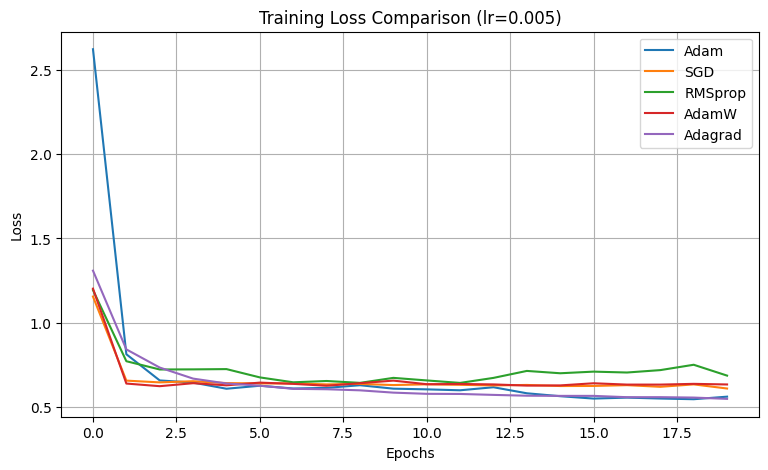

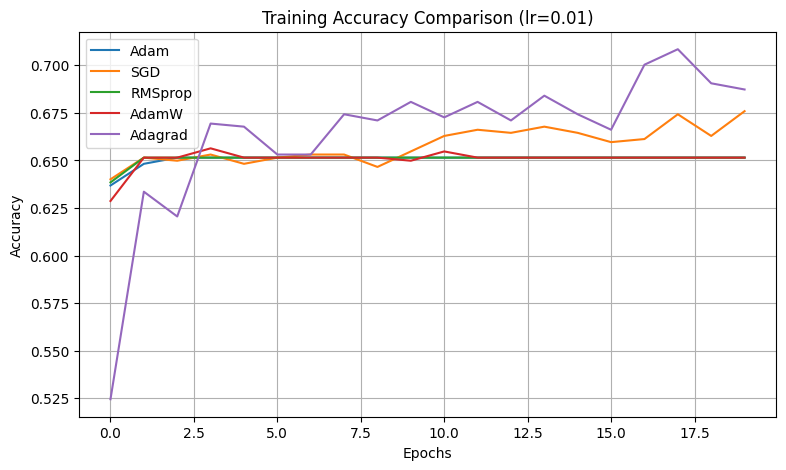

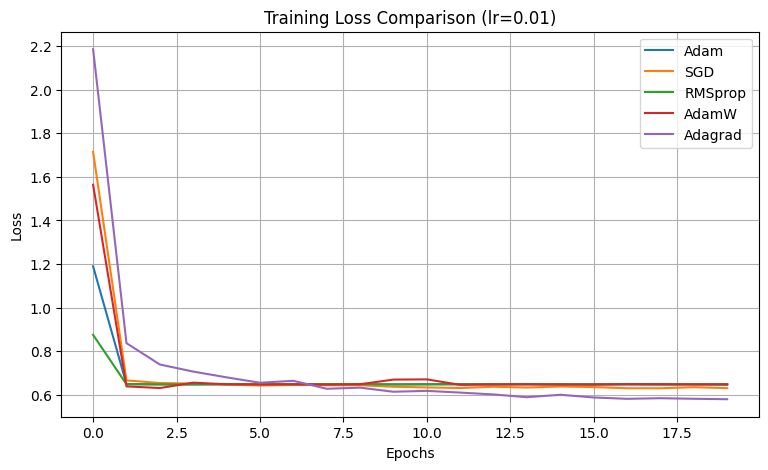

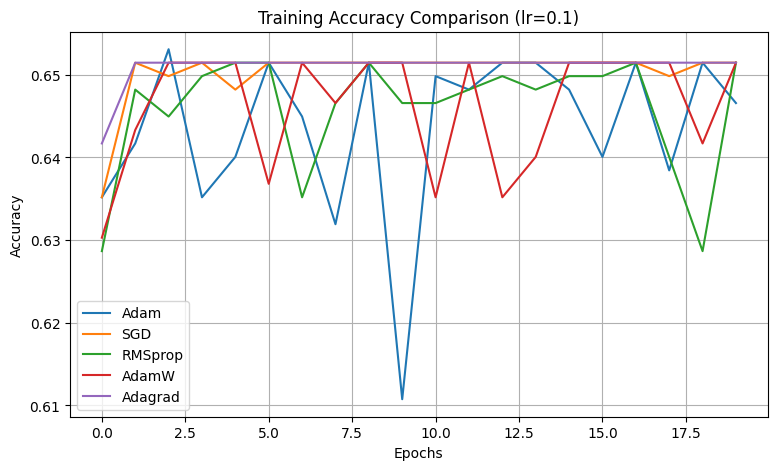

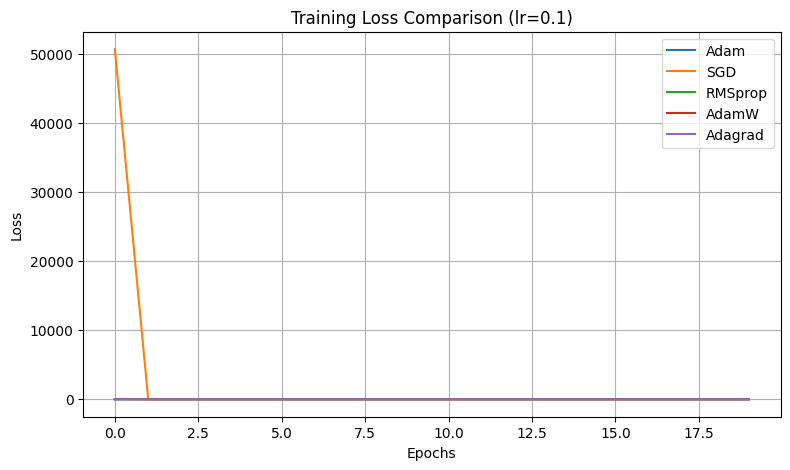

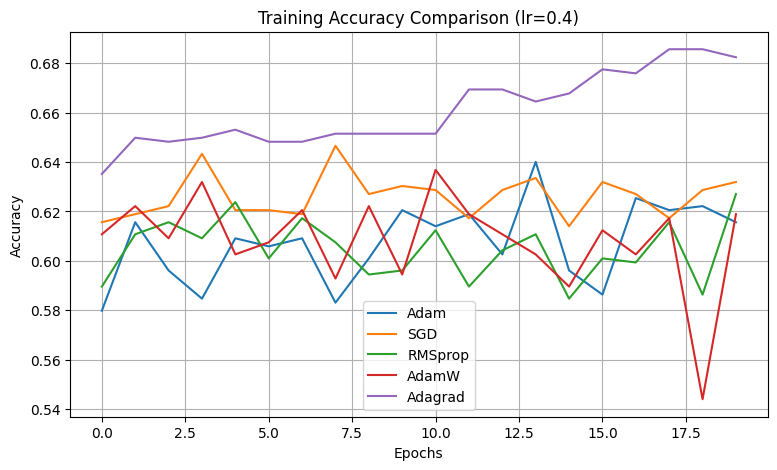

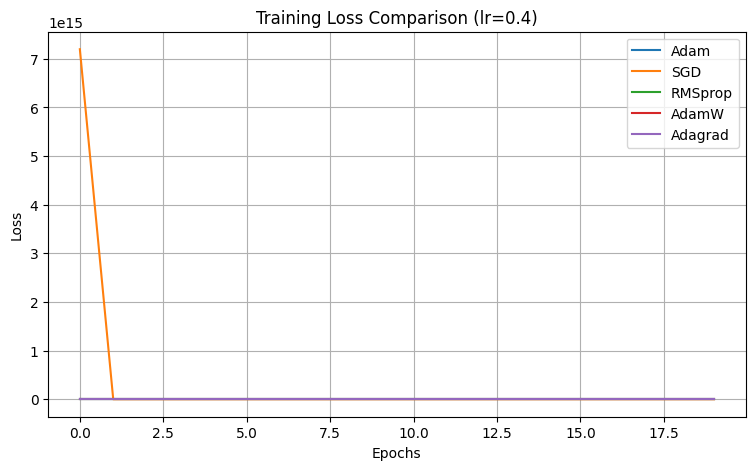

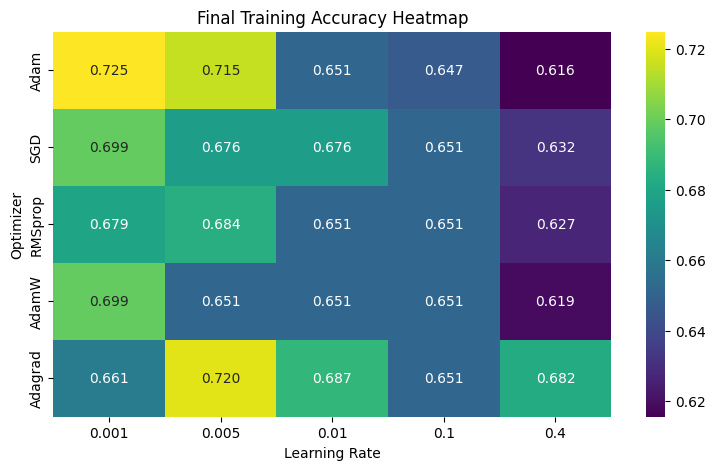

In [201]:
for lr in l_lr:
  plot_hyperparameters(l_histories, lr, 'accuracy')
  plot_hyperparameters(l_histories, lr, 'loss')

plot_heatmap(l_histories)

The previous figures display a comparison of different optimizer algorithms for different learning rate and an heatmap, which is a summary of those results.

According to the heatmap, Adam algorithm shows better performances regarding the accruracy, achieving 73% and 71% of accuracy with a learning rate of 0.001 and 0.720. The Adamgrad algorithm achieved similar performance with a learning rate of 0.005.

### Scaler

In [202]:
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

checkpoints = tf.keras.callbacks.ModelCheckpoint(filepath="./weights_scaled_model-{epoch:03d}-{val_loss:.4f}.weights.h5", monitor="val_loss", mode="min", save_best_only=True, save_weights_only=True, verbose=1)
callbacks = [checkpoints]

history = model.fit(X_train_scaled, y_train, epochs=350, batch_size=10, shuffle=False, validation_data=(X_val_scaled, y_val), callbacks=callbacks, verbose=0)


Epoch 1: val_loss improved from inf to 0.60426, saving model to ./weights_scaled_model-001-0.6043.weights.h5

Epoch 2: val_loss improved from 0.60426 to 0.58677, saving model to ./weights_scaled_model-002-0.5868.weights.h5

Epoch 3: val_loss improved from 0.58677 to 0.57117, saving model to ./weights_scaled_model-003-0.5712.weights.h5

Epoch 4: val_loss improved from 0.57117 to 0.55630, saving model to ./weights_scaled_model-004-0.5563.weights.h5

Epoch 5: val_loss improved from 0.55630 to 0.54198, saving model to ./weights_scaled_model-005-0.5420.weights.h5

Epoch 6: val_loss improved from 0.54198 to 0.53049, saving model to ./weights_scaled_model-006-0.5305.weights.h5

Epoch 7: val_loss improved from 0.53049 to 0.52288, saving model to ./weights_scaled_model-007-0.5229.weights.h5

Epoch 8: val_loss improved from 0.52288 to 0.51420, saving model to ./weights_scaled_model-008-0.5142.weights.h5

Epoch 9: val_loss improved from 0.51420 to 0.50859, saving model to ./weights_scaled_model-

## From binary classification to multi labels classification

In [203]:
X, y = data[:, 0:4], data[:, -1]
y_cat = tf.keras.utils.to_categorical(data[:,-1], 3)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2)
print(y_train.shape)

mlp16 = Sequential(
    [
        Dense(16, input_shape=(4,), activation='relu'),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')
    ]
)
mlp16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp16.summary()

(120, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_199"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_530 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_531 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_532 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [204]:
history = mlp16.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0, validation_split=0.2)

acc, loss, val_acc, val_loss = history.history.values()
print("Accuracy :", acc)
print("Loss :", loss)
print("Val_accuracy :", val_acc)
print("Val_loss :", val_loss)

Accuracy : [0.5416666865348816, 0.5729166865348816, 0.6145833134651184, 0.6354166865348816, 0.6458333134651184, 0.6458333134651184, 0.5104166865348816, 0.53125, 0.5729166865348816, 0.4479166567325592, 0.40625, 0.53125, 0.4583333432674408, 0.4166666567325592, 0.46875, 0.4375, 0.4791666567325592, 0.65625, 0.6666666865348816, 0.6666666865348816, 0.6458333134651184, 0.6458333134651184, 0.6666666865348816, 0.6666666865348816, 0.6770833134651184, 0.75, 0.71875, 0.6875, 0.6770833134651184, 0.6875, 0.8125, 0.7291666865348816, 0.71875, 0.7916666865348816, 0.84375, 0.90625, 0.875, 0.875, 0.875, 0.8645833134651184, 0.8229166865348816, 0.875, 0.9166666865348816, 0.8958333134651184, 0.8541666865348816, 0.8854166865348816, 0.9270833134651184, 0.8958333134651184, 0.9270833134651184, 0.90625, 0.9270833134651184, 0.9479166865348816, 0.90625, 0.9270833134651184, 0.9583333134651184, 0.9375, 0.90625, 0.9479166865348816, 0.96875, 0.9583333134651184, 0.90625, 0.9583333134651184, 0.9583333134651184, 0.96875,

In [205]:
pred = (mlp16.predict(X_test) > 0.5).astype(int)

for i in range(len(X_test)):
  if (np.argmax(pred[i]) != np.argmax(y_test[i])):
    print(X_test[i], "-", pred[i], "-", y_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[5.9 3.2 4.8 1.8] - [0 0 1] - [0. 1. 0.]


## Move to MNIST dataset

In [206]:
import tensorflow.keras.datasets.mnist as mnist
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [207]:
def mnist_mlp(hlayer1, hlayer2):
  model = Sequential(
      [
          Flatten(input_shape=(28, 28)),
          Dense(hlayer1, activation='relu'),
          Dense(hlayer2, activation='relu'),
          Dense(10, activation='softmax')
      ]
  )

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

mnist64 = mnist_mlp(64, 32)
mnist64.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_200"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_533 (Dense)               │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_534 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_535 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
units = [16*2**i for i in range(5)]
histories, models = {}, {}

for unit in units:
  model = mnist_mlp(unit, unit // 2)
  history = model.fit(x_train, y_train_cat, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
  histories[unit] = history
  models[unit] = model

In [ ]:
def plot_train_metric(histories, metric, figsize=(16, 6)):
    plt.figure(figsize=figsize)

    # Training
    plt.subplot(1, 2, 1)
    for unit, history in histories.items():
        plt.plot(history.history[metric], label=f'{unit} units')
    plt.title(f'Training {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(False)

    # Validation
    plt.subplot(1, 2, 2)
    for unit, history in histories.items():
        plt.plot(history.history[f'val_{metric}'], label=f'{unit} units')
    plt.title(f'Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(False)

    plt.tight_layout()
    plt.show()

In [ ]:
plot_train_metric(histories, 'accuracy')
plot_train_metric(histories, 'loss')

According to the last figure, in my opinion the best model is either the one with 256 units or 128, which show similar performances, especially attending around 98% of accuracy during training and validation.

In [ ]:
best_model = models[256]

preds = np.argmax(best_model.predict(x_test), axis=1)
acc = accuracy_score(y_test, preds)
print(acc)

Finally, this model achieved 98% of accuracy on test data, which is very good !

## Own writing

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image

img_pil = Image.open("digit3.png")
img = np.array(img_pil)
img = img / 255.0
img = np.mean(img, axis=2)
img = np.expand_dims(np.array(img), axis=0)
print(img.shape)

pred = np.argmax(best_model.predict(img))

plt.imshow(img_pil, cmap='gray')
plt.title(f'Prediction: {pred}')
plt.axis('off')
plt.show()

Unfortunately, the model's predictions are mostly wrong when it comes to my own writing.